In [1]:
import re

def extract_movie_title(text):
    # 대문자로 시작하는 단어 또는 인용 부호로 둘러싸인 문자열 추출
    movie_title_pattern = r'([A-Z][\w\s]+)|("[^"]+")'
    movie_titles = re.findall(movie_title_pattern, text)
    # 추출된 영화 제목들을 리스트로 반환
    return [title[0] if title[0] else title[1] for title in movie_titles]

def extract_genre(text):
    # 장르를 나타내는 단어 또는 구절을 추출
    genre_patterns = ['장르:', '분류:', '장르는', '분류는']
    for pattern in genre_patterns:
        if pattern in text:
            # 해당 패턴 이후의 문자열을 추출하여 공백을 기준으로 장르를 분리
            genre_text = text.split(pattern, 1)[1]
            genre = genre_text.split()[0]
            return genre
    return None

# 예시 텍스트
text = "영화 '인셉션'은 SF 액션 영화입니다."
print("영화 제목:", extract_movie_title(text))
print("장르:", extract_genre(text))

영화 제목: ['SF 액션 영화입니다']
장르: None


In [2]:
# !pip install git+https://github.com/haven-jeon/PyKoSpacing.git
# !python -m spacy download en_core_web_md

In [3]:
import re
from pykospacing import Spacing
from nltk.tokenize import word_tokenize

spacing = Spacing()

def preprocessing(text):
    text = text.lower()                   # 소문자 변경
    text = re.sub(r'[^\w\s]', '', text)
    text = spacing(text)
    return text

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# NLTK의 불영어 다운로드
nltk.download('stopwords')
nltk.download('punkt')

# 표제어 라이브러리
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CDL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CDL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
def map_pos_tag(pos):
    pos_tags = {
        'ADJ': '형용사',
        'ADP': '전치사',
        'ADV': '부사',
        'AUX': '조동사',
        'CONJ': '접속사',
        'CCONJ': '접속 부사',
        'DET': '관형사',
        'INTJ': '감탄사',
        'NOUN': '명사',
        'NUM': '수사',
        'PART': '부분',
        'PRON': '대명사',
        'PROPN': '고유 명사',
        'PUNCT': '구두점',
        'SCONJ': '보조 접속사',
        'SYM': '기호',
        'VERB': '동사',
        'X': '기타',
        'SPACE': '공백'
    }
    return pos_tags.get(pos, pos)

def map_dep_label(dep):
    dep_labels = {
        'ROOT': '루트',
        'acl': '보어',
        'acomp': '형용사 보어',
        'advcl': '부사절 보어',
        'advmod': '부사어',
        'agent': '동작의 수행자',
        'amod': '관형어',
        'appos': '부가설명',
        'attr': '주어',
        'aux': '보조',
        'auxpass': '수동보조',
        'case': '전치사',
        'cc': '접속',
        'ccomp': '보어',
        'compound': '복합어',
        'conj': '연결',
        'cop': '동사',
        'csubj': '동사절 주어',
        'csubjpass': '수동동사절 주어',
        'dative': '간접 목적어',
        'dep': '종속',
        'det': '관형어',
        'dobj': '목적어',
        'expl': '외부 의존',
        'intj': '감탄',
        'mark': '표지',
        'meta': '메타',
        'neg': '부정',
        'nmod': '명사 보어',
        'npadvmod': '명사부사어',
        'nsubj': '주어',
        'nsubjpass': '수동 주어',
        'nummod': '수 모드',
        'oprd': '대용어',
        'parataxis': '병렬구문',
        'pcomp': '명사구문 보어',
        'pobj': '명사구문 목적어',
        'poss': '소유관계',
        'preconj': '전치사 접속어',
        'predet': '관형사 접속어',
        'prep': '전치사',
        'prt': '부호',
        'punct': '구두점',
        'quantmod': '양 변형',
        'relcl': '관계절',
        'reparandum': '재구문',
        'root': '루트',
        'vocative': '호명',
        'xcomp': '보어 동사'
    }
    return dep_labels.get(dep, dep)


In [6]:
text = '''의사 전면휴진 '참여율'이 관건…"미미할 것" vs "압도적 지지"'''

# 텍스트 토큰화
tokens = word_tokenize(preprocessing(text))

# NLTK의 불용어 리스트
stop_words = set(stopwords.words('english'))

# 불용어 제거
filltered_tokens = [word for word in tokens if word.lower() not in stop_words]

# 표제어 추출
Lemmatization = [lemmatizer.lemmatize(token) for token in filltered_tokens]

print(preprocessing(text))
print(filltered_tokens)
print(Lemmatization)

의사 전면 휴진 참여율이 관건 미미할 것 vs 압도적 지지
['의사', '전면', '휴진', '참여율이', '관건', '미미할', '것', 'vs', '압도적', '지지']
['의사', '전면', '휴진', '참여율이', '관건', '미미할', '것', 'v', '압도적', '지지']


In [7]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_md")
doc = nlp(preprocessing(text))

# 토큰 정보 수집
tokens_info = []
for token in doc:
    tokens_info.append({
        '텍스트': token.text,
        '품사': map_pos_tag(token.pos_),
        '의존성': map_dep_label(token.dep_)
    })

# 데이터프레임 생성
df = pd.DataFrame(tokens_info)
# 결과 출력
df

,텍스트,품사,의존성
0,의사,고유 명사,명사 보어
1,전면,고유 명사,복합어
2,휴진,고유 명사,복합어
3,참여율이,고유 명사,명사부사어
4,관건,고유 명사,복합어
5,미미할,고유 명사,루트
6,것,기타,전치사
7,vs,전치사,전치사
8,압도적,고유 명사,복합어
9,지지,명사,명사부사어


In [8]:
# import pandas as pd
# # 샘플 데이터
# data = {
#     "text" : [
#         "가족과 함께 볼 수 있는 영화 추천해줘.",
#         "레오나르도 디카프리오가 출연한 영화 알려줘.",
#         "오늘 밤 볼만한 스릴러 영화 있나요?",
#         "어린이들이 좋아할 만한 애니메이션 추천해줘.",
#         "로맨틱 코미디 영화 추천해줘.",
#         "마블 영화 리스트 보여줘.",
#         "최신 영화 중 추천해줄 만한 거 있어?",
#         "크리스마스에 볼 만한 영화 뭐 있어?",
#         "액션 영화 추천해줘.",
#         "공포 영화 추천해줘.",
#         "역사 영화 추천해줘.",
#         "SF 영화 중 재미있는 거 추천해줘.",
#         "코미디 영화 추천해줘.",
#         "고전 영화 추천해줘.",
#         "최근에 개봉한 영화 뭐 있어?",
#         "영화관에서 볼 만한 영화 뭐 있어?",
#         "넷플릭스에서 볼 만한 영화 뭐 있어?",
#         "디즈니 영화 추천해줘.",
#         "한국 영화 추천해줘.",
#         "일본 애니메이션 영화 추천해줘."
#  ],
#  "intent" : [
#          "영화 추천",
#         "특정 배우의 영화 검색",
#         "영화 추천",
#         "영화 추천",
#         "영화 추천",
#         "특정 주제의 영화 리스트",
#         "영화 추천",
#         "특정 주제의 영화 리스트",
#         "영화 추천",
#         "영화 추천",
#         "영화 추천",
#         "영화 추천",
#         "영화 추천",
#         "영화 추천",
#         "특정 주제의 영화 리스트",
#         "특정 주제의 영화 리스트",
#         "특정 주제의 영화 리스트",
#         "영화 추천",
#         "영화 추천",
#         "영화 추천"
# ]
# }

# df = pd.DataFrame(data)
# df

In [9]:
df = pd.read_csv(r'C:\Users\CDL\Documents\GitHub\aicc_contest\Database\qusetion.csv', encoding='cp949')
df.head()

,Qusetion,Target
0,감동적인 드라마 영화 추천해 주세요.,드라마&가족
1,최근에 나온 드라마 영화 추천해 줄 수 있나요?,드라마&가족
2,고전 드라마 영화 중에 추천할 만한 작품이 있을까요?,드라마&가족
3,실화를 바탕으로 한 드라마 영화 추천 부탁해요.,드라마&가족
4,감정이입이 잘 되는 드라마 영화 추천해 주세요.,드라마&가족


In [10]:
# 분류 모델을 위한 라이브러리
import numpy as np

import torch
import gensim
from gensim.models import Word2Vec

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

In [11]:
# Word2Vec을 사용한 백터화 
# 단어 임베딩이 아니면, TF-IDF를 이용해 진행할 수 있다.
sentence = [sentence.split() for sentence in df['Qusetion']]
word2vec_model = Word2Vec(sentence, vector_size=100, window=5, min_count=1, workers=4)

def sentence_to_vec(sentence, model):
    words = sentence.split()
    vecs = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

In [12]:
# X, y 데이터 나누기
X_w2v = np.array([sentence_to_vec(sentence, word2vec_model) for sentence in df['Qusetion']])
y = df['Target']
le = LabelEncoder()                # 문자열로 된 라벨을 숫자로 변환
y_enc = le.fit_transform(y)

In [13]:
model = LogisticRegression()
# cv : 교차 검증을 수행할 fold 수
# scoring : 성능 측정 지표
scores = cross_val_score(model, X_w2v, y_enc, cv=5, scoring='accuracy')
print("Word2Vec 교차 검증 정확도: ", scores)
print("평균 Word2Vec 교차 검증 정확도: ", np.mean(scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Word2Vec 교차 검증 정확도:  [0.77136515 0.92559689 0.89006108 0.87784564 0.75402554]
평균 Word2Vec 교차 검증 정확도:  0.8437788600610958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# 훈련 set, 테스트 set 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split \
                        (X_w2v, y_enc, test_size=0.2, random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 데이터로 예측

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


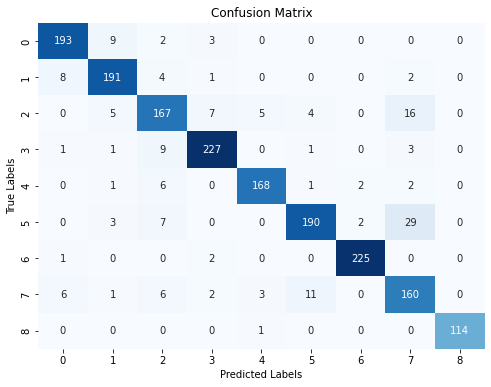

In [15]:
# 혼동 행렬 생성
confusion_mat = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
def score(y_test, y_pred, y_pred_proba, model, averages):
    scores = []
    for average in averages:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=average, zero_division=1)
        recall = recall_score(y_test, y_pred, average=average, zero_division=1)
        f1 = f1_score(y_test, y_pred, average=average, zero_division=1)
        logloss = log_loss(y_test, y_pred_proba, labels=model.classes_)
        scores.append([accuracy, precision, recall, f1, logloss])
    return scores

# 여러 평균값에 대한 평가 수행
averages = ['weighted', 'micro', 'macro']
evaluation_scores = score(y_test, y_pred, y_pred_proba, model, averages)

evaluation_df = pd.DataFrame(evaluation_scores, columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Log Loss'], index=averages)
evaluation_df

,Accuracy,Precision,Recall,F1-score,Log Loss
weighted,0.907325,0.909353,0.907325,0.907697,0.346712
micro,0.907325,0.907325,0.907325,0.907325,0.346712
macro,0.907325,0.911311,0.910750,0.910415,0.346712


In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']
             }

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최고 교차 검증 정확도: ", grid_search.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최적 하이퍼파라미터:  {'C': 100, 'penalty': 'l2'}
최고 교차 검증 정확도:  0.9240702829824968


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# 최적 하이퍼파라미터로 모델 재학습
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [29]:
# 텍스트를 Word2Vec을 사용하여 벡터화
test_text = input("텍스트를 입력하세요: ")
test_vector = sentence_to_vec(test_text, word2vec_model)

# 모델에 입력하여 예측
predicted_proba = best_model.predict_proba(test_vector.reshape(1, -1))[0]

# 확률이 높은 순으로 정렬
sorted_indices = predicted_proba.argsort()[::-1]
sorted_proba = predicted_proba[sorted_indices]
sorted_classes = model.classes_[sorted_indices]

# 50% 이상의 확률을 가진 예측값만 선택, 최대 3개까지 선택
threshold = 0.2
selected_indices = sorted_indices[sorted_proba >= threshold][:3]
selected_proba = sorted_proba[sorted_proba >= threshold][:3]
selected_classes = sorted_classes[sorted_proba >= threshold][:3]

# 예측 결과 출력
print("텍스트:", test_text)
for cls, proba in zip(selected_classes, selected_proba):
    print(f"예측 클래스 : {cls}, 확률: {proba:.2f}")

텍스트를 입력하세요: 그 권상우 영화 뭐있어?
텍스트: 그 권상우 영화 뭐있어?
예측 클래스 : 6, 확률: 0.99


In [30]:
# Target 열의 고유 값 확인
unique_targets = df['Target'].unique()

# 예측된 클래스의 고유 값 출력
for cls in selected_classes:
    print(unique_targets[cls])

공포&스릴러


In [21]:
from sklearn.metrics import classification_report
import pandas as pd

# 최적의 모델로 테스트 데이터 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# classification_report 함수를 사용하여 분류 리포트 생성
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# 분류 리포트를 데이터프레임으로 변환
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(index='accuracy')
report_df


,precision,recall,f1-score,support
SF&판타지,0.952830,0.975845,0.964200,207.0
공포&스릴러,0.955882,0.946602,0.951220,206.0
드라마&가족,0.883838,0.857843,0.870647,204.0
러닝타임별 영화 추천,0.954918,0.962810,0.958848,242.0
로맨스 영화 추천,0.950276,0.955556,0.952909,180.0
배우에 따른 영화 추천,0.922374,0.874459,0.897778,231.0
시대별,0.991111,0.978070,0.984547,228.0
액션&전쟁 영화 추천,0.828431,0.894180,0.860051,189.0
영화정보제공,1.000000,1.000000,1.000000,115.0
macro avg,0.937740,0.938374,0.937800,1802.0


In [22]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [23]:
import pickle
# 모델 저장
with open('best_logistic_regression_model.pkl', 'wb') as file:
	pickle.dump(best_model, file)

# 저장된 모델 불러오기 예제
with open('best_logistic_regression_model.pkl', 'rb') as file:
	loaded_model = pickle.load(file)